<a href="https://colab.research.google.com/github/divyashriashokan/Prep_insta_Internship/blob/main/World_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
population = pd.read_csv("country_population.csv")
fertility = pd.read_csv("fertility_rate.csv")
expectancy = pd.read_csv("life_expectancy.csv")
country = pd.read_csv("Metadata_Country.csv")

In [4]:
country.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [5]:
country = country[['Country Code','Region']]

In [6]:
country.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [7]:
country.isna().sum()

Country Code     0
Region          46
dtype: int64

In [8]:
country.shape

(263, 2)

In [9]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [10]:
population.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [11]:
population.drop(['Indicator Name','Indicator Code','Country Name'],axis=1,inplace=True)

In [12]:
population.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [13]:
population.shape

(264, 58)

In [14]:
population.dropna(axis=0,inplace=True)

In [15]:
population.shape

(258, 58)

In [16]:
# Melting population dataset

years = [str(i) for i in range(1960,2017)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [17]:
df = pd.melt(population, id_vars = 'Country Code', value_vars = years, var_name = 'Year',value_name = 'Population')

In [18]:
df.head()

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0


In [19]:
df.tail()

,Country Code,Year,Population
14701,XKX,2016,1816200.0
14702,YEM,2016,27584213.0
14703,ZAF,2016,56015473.0
14704,ZMB,2016,16591390.0
14705,ZWE,2016,16150362.0


In [20]:
df.shape

(14706, 3)

In [21]:
country.head()

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFG,South Asia
2,AGO,Sub-Saharan Africa
3,ALB,Europe & Central Asia
4,AND,Europe & Central Asia


In [22]:
#country and population merge

country_population_df =pd.merge(country,df,how='left',on='Country Code')

In [23]:
country_population_df.head()

,Country Code,Region,Year,Population
0,ABW,Latin America & Caribbean,1960,54211.0
1,ABW,Latin America & Caribbean,1961,55438.0
2,ABW,Latin America & Caribbean,1962,56225.0
3,ABW,Latin America & Caribbean,1963,56695.0
4,ABW,Latin America & Caribbean,1964,57032.0


In [24]:
fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
fertility.drop(['Country Name','Indicator Name','Indicator Code'],axis=1,inplace=True)

In [26]:
fertility.shape

(264, 58)

In [27]:
fertility.dropna(axis=0,inplace=True)

In [28]:
fertility.shape

(235, 58)

In [29]:
fertility_df = pd.melt(fertility, id_vars = 'Country Code', value_vars = years, var_name = 'Year', value_name = 'Fertility_rate')

In [30]:
fertility_df.head()

,Country Code,Year,Fertility_rate
0,ABW,1960,4.820000
1,AFG,1960,7.450000
2,AGO,1960,7.478000
3,ALB,1960,6.489000
4,ARB,1960,6.948747


In [31]:
new_df = pd.merge(country_population_df, fertility_df, how='left',on=['Country Code','Year'])

In [32]:
new_df.head()

,Country Code,Region,Year,Population,Fertility_rate
0,ABW,Latin America & Caribbean,1960,54211.0,4.820
1,ABW,Latin America & Caribbean,1961,55438.0,4.655
2,ABW,Latin America & Caribbean,1962,56225.0,4.471
3,ABW,Latin America & Caribbean,1963,56695.0,4.271
4,ABW,Latin America & Caribbean,1964,57032.0,4.059


In [33]:
expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
expectancy.drop(['Country Name','Indicator Name','Indicator Code'],axis=1,inplace=True)

In [35]:
expectancy.shape

(264, 58)

In [36]:
expectancy.dropna(axis=0,inplace=True)

In [37]:
expectancy.shape

(235, 58)

In [38]:
expectancy_df = pd.melt(expectancy, id_vars = 'Country Code', value_vars = years, var_name = 'Year', value_name = 'Life_expectancy')

In [39]:
expectancy_df.head()

,Country Code,Year,Life_expectancy
0,ABW,1960,65.662000
1,AFG,1960,32.292000
2,AGO,1960,33.251000
3,ALB,1960,62.279000
4,ARB,1960,46.825065


In [40]:
new_df = pd.merge(new_df,expectancy_df,how='left',on=['Country Code','Year'])

In [41]:
new_df.head()

,Country Code,Region,Year,Population,Fertility_rate,Life_expectancy
0,ABW,Latin America & Caribbean,1960,54211.0,4.820,65.662
1,ABW,Latin America & Caribbean,1961,55438.0,4.655,66.074
2,ABW,Latin America & Caribbean,1962,56225.0,4.471,66.444
3,ABW,Latin America & Caribbean,1963,56695.0,4.271,66.787
4,ABW,Latin America & Caribbean,1964,57032.0,4.059,67.113


In [42]:
new_df.isna().sum().sum()

5492

In [43]:
new_df.dropna(axis=0,inplace=True)

In [44]:
new_df.isna().sum()

Country Code       0
Region             0
Year               0
Population         0
Fertility_rate     0
Life_expectancy    0
dtype: int64

In [45]:
new_df.isna().sum().sum()

0

In [46]:
new_df.shape

(10602, 6)

In [47]:
import plotly.express as px

In [114]:
px.scatter(new_df,
           x="Fertility_rate",
           y="Life_expectancy",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           color="Region",
           hover_name="Country Code",
           log_x=True,
           size_max=55,
           range_x=[1,10],
           range_y=[10,100])

In [49]:
px.bar(new_df,
           x="Region",
           y="Population",
           animation_frame="Year",
           animation_group="Country Code",
           color="Region",
           range_y=[0,2500000000])

<Axes: xlabel='Year', ylabel='Population'>

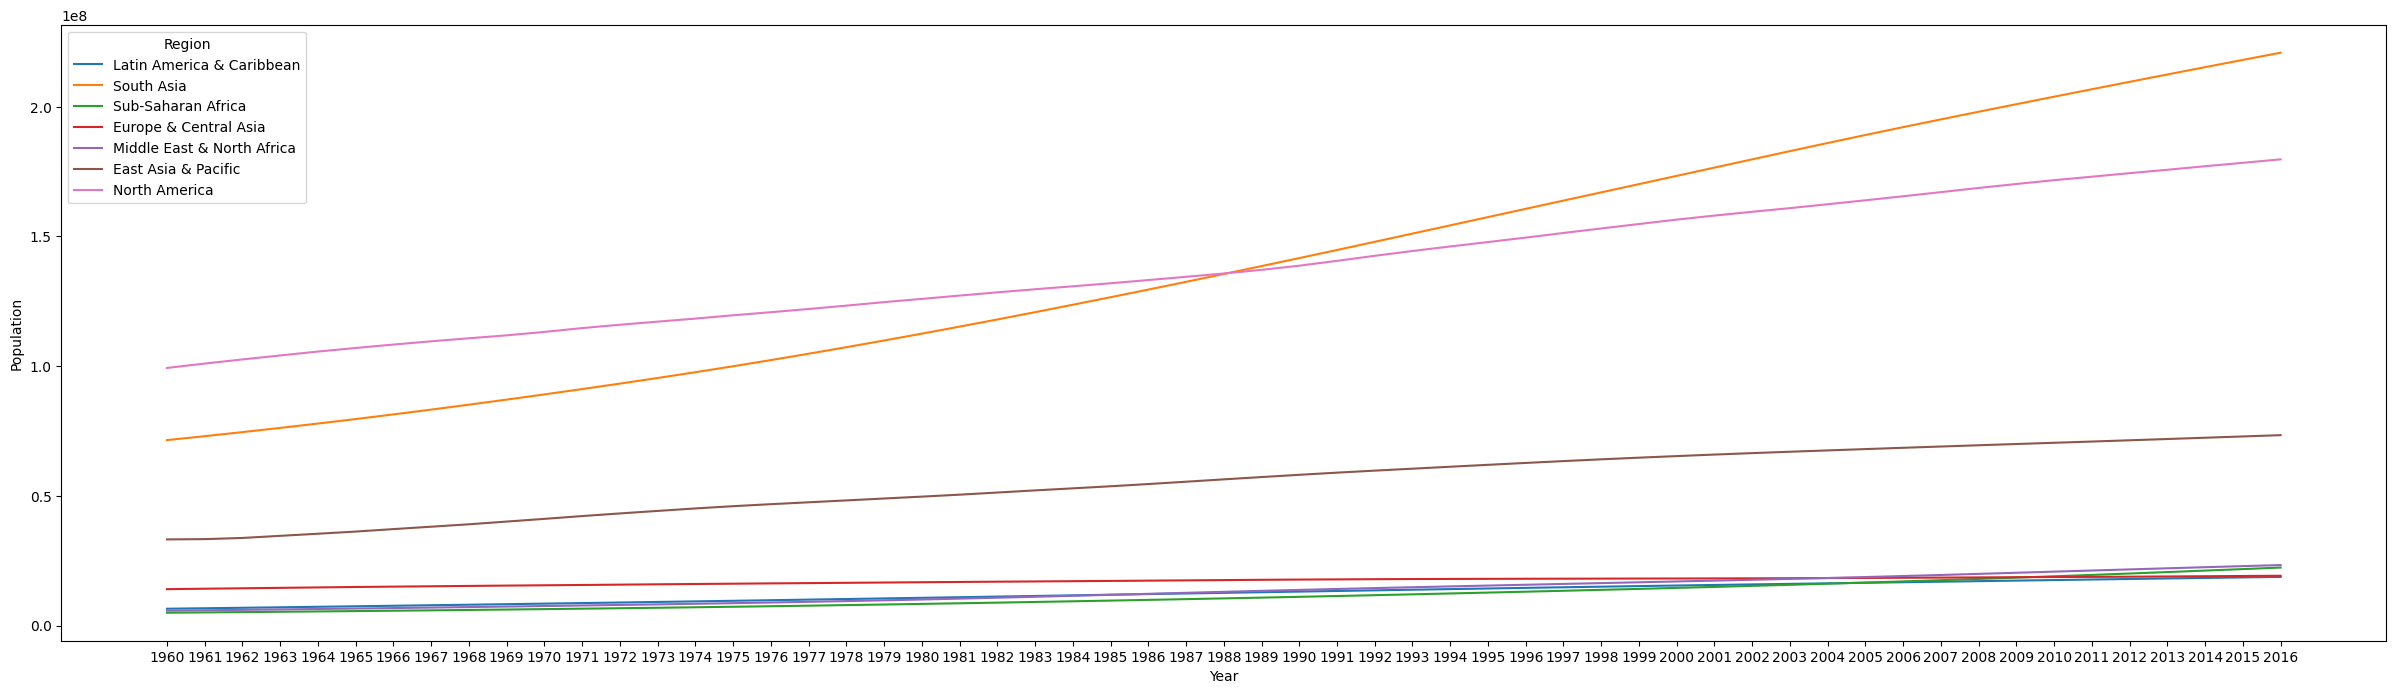

In [112]:
#Population Trends (Years vs Population)(Line Graph)
plt.figure(figsize=(30,8))
sns.lineplot(data = new_df,x = 'Year',y='Population',hue='Region',errorbar=None, markers=True)

<Axes: xlabel='Region', ylabel='Fertility_rate'>

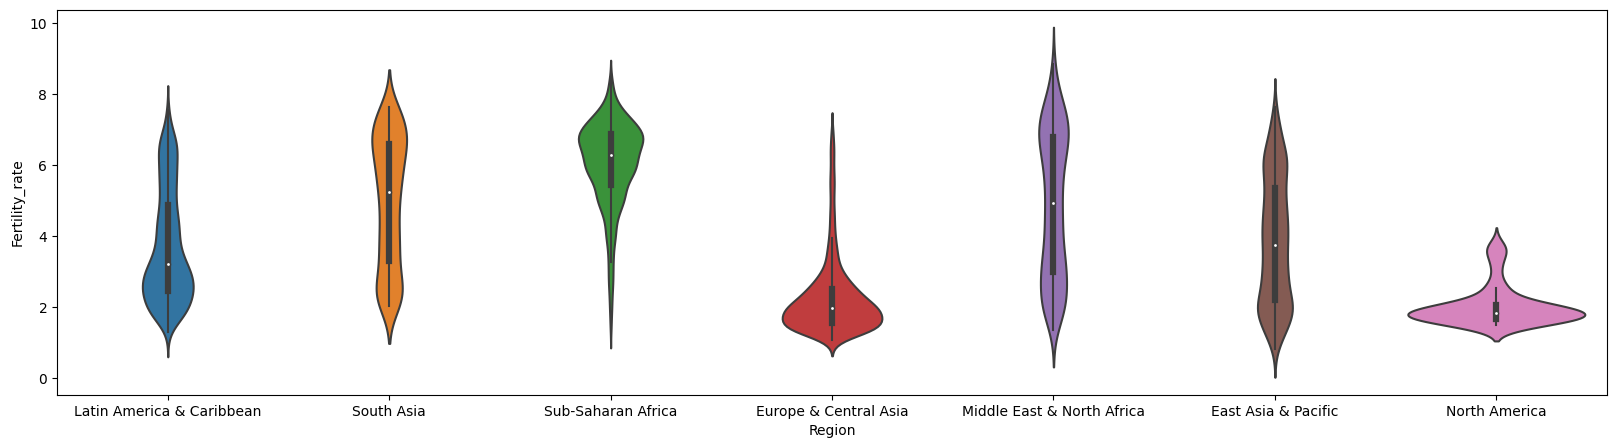

In [113]:
# Fertility Rate Distribution
plt.figure(figsize=(20,5))
sns.violinplot(data = new_df, x = 'Region',y='Fertility_rate')

<Figure size 1500x1000 with 0 Axes>

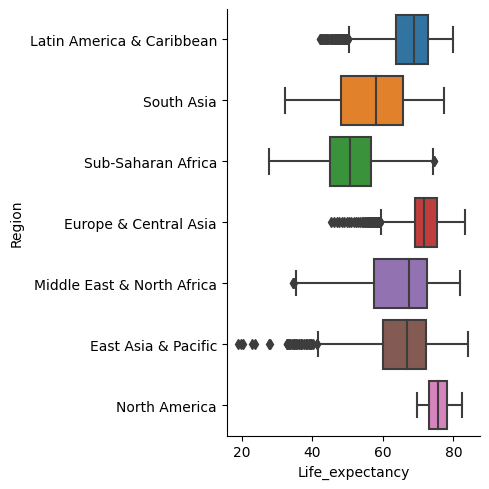

In [101]:
# Life expectancy variation

plt.figure(figsize=(15,10))
sns.catplot(data = new_df, x = 'Life_expectancy', y ='Region',kind='box')

In [124]:
# Correlation Analysis
new_df.corr()

<ipython-input-124-7182d8eccd89>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Population,Fertility_rate,Life_expectancy
Population,1.000000,-0.094118,0.043052
Fertility_rate,-0.094118,1.000000,-0.850496
Life_expectancy,0.043052,-0.850496,1.000000


In [129]:
# Regional Analysis

#Population
new_df.groupby('Region').Population.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,1767.0,5.514822e+07,1.941923e+08,41233.0,201717.00,3112900.0,2.803269e+07,1.378665e+09
Europe & Central Asia,2679.0,1.710541e+07,2.633533e+07,109420.0,3258895.00,6349558.0,1.485616e+07,1.486890e+08
Latin America & Caribbean,1938.0,1.258915e+07,2.868883e+07,32500.0,290231.75,3380350.5,9.935425e+06,2.076529e+08
Middle East & North Africa,1026.0,1.332493e+07,1.804352e+07,47384.0,1129269.75,5629797.5,1.898873e+07,9.568868e+07
North America,114.0,1.385096e+08,1.159804e+08,17909009.0,27016000.00,108467802.0,2.439465e+08,3.231275e+08
South Asia,456.0,1.395059e+08,2.901901e+08,89887.0,6946704.50,19230180.5,1.011002e+08,1.324171e+09
Sub-Saharan Africa,2622.0,1.150900e+07,1.904377e+07,64177.0,1613695.25,5512042.0,1.257217e+07,1.859896e+08


In [130]:
#Fertility Rate
new_df.groupby('Region').Fertility_rate.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,1767.0,3.859619,1.773273,0.827,2.20000,3.75900,5.376500,7.651
Europe & Central Asia,2679.0,2.281504,1.091926,1.085,1.57000,1.97000,2.527500,7.035
Latin America & Caribbean,1938.0,3.716332,1.573497,1.300,2.45600,3.22650,4.883750,7.555
Middle East & North Africa,1026.0,4.907883,2.056389,1.350,2.98325,4.95300,6.797000,8.866
North America,114.0,2.042130,0.560204,1.490,1.68310,1.84375,2.061125,3.811
South Asia,456.0,4.974945,1.804942,2.046,3.30575,5.26000,6.608750,7.635
Sub-Saharan Africa,2622.0,6.047690,1.211887,1.360,5.44200,6.27950,6.891000,8.462


In [131]:
#Life expectancy
new_df.groupby('Region').Life_expectancy.describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East Asia & Pacific,1767.0,65.608848,10.025469,18.907000,59.974500,66.877000,72.310500,84.278049
Europe & Central Asia,2679.0,71.818917,5.435181,45.369000,69.013341,71.526829,75.481402,83.229268
Latin America & Caribbean,1938.0,67.519839,7.245098,42.113000,63.797750,68.865000,72.800500,79.831000
Middle East & North Africa,1026.0,64.814275,9.619820,34.361000,57.481250,67.504000,72.439750,81.946341
North America,114.0,75.631627,3.357559,69.770732,72.957744,75.620732,78.182622,82.300512
South Asia,456.0,56.747050,11.107346,32.292000,48.026000,58.067000,65.688000,77.339000
Sub-Saharan Africa,2622.0,50.721194,8.314071,27.610000,45.058500,50.566500,56.731250,74.394878
